# Download price data from Yahoo finance using tickers name

In [1]:
# Importing necessary libraries

import numpy as np  # library for numerical operations
import pandas as pd  # library for data manipulation and analysis
import yfinance as yf  # library to download financial data from Yahoo Finance
import warnings  # library for handling warnings

[*********************100%***********************]  1 of 1 completed
Average return: 0.33%


<AxesSubplot:title={'center':'AMZN returns: 2023-01-01 - 2023-07-31'}, xlabel='Date'>

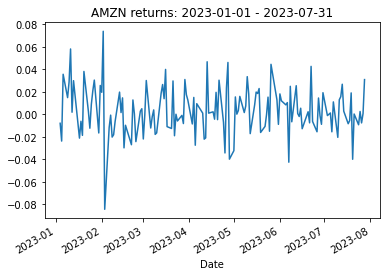

In [2]:
# Setting the ticker symbol for the risky asset and the start and end dates for the analysis
RISKY_ASSET = 'AMZN'
START_DATE = '2023-01-01'
END_DATE = '2023-07-31'

# Downloading the historical data for the risky asset over the defined period
df = yf.download(RISKY_ASSET, start=START_DATE,end=END_DATE)

# Selecting the 'Adj Close' (Adjusted Close Price) column
adj_close = df['Adj Close']

# Calculating the percentage change in prices to get returns and dropping the first row (NaN value)
returns = adj_close.pct_change().dropna()

# Printing the average return of the risky asset
print(f'Average return: {100 * returns.mean():.2f}%')

# Plotting the returns of the risky asset
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')

### An histogram of the returns

Portfolio Value Histogram:


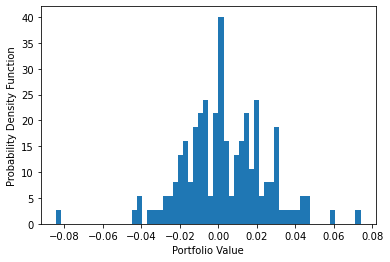

In [3]:
import matplotlib.pyplot as pl

# Printing a statement before the histogram
print('Portfolio Value Histogram:')

# Creating a new figure for the histogram
pl.figure()
pl.hist(returns,bins=60, density=True, stacked=True)
pl.xlabel('Portfolio Value')
pl.ylabel('Probability Density Function')
pl.show()

## Download more than 1 ticker

In [4]:
# This line ignores all warnings
warnings.filterwarnings("ignore")

# This line replaces pandas' default data download function with yfinance's 
yf.pdr_override()

# This line formats all float numbers in pandas to be displayed as percentages with 4 decimal places
pd.options.display.float_format = '{:.4%}'.format

# Defining the start and end dates for the period we want to study
start = '2019-01-01'
end = '2021-12-30'

# Defining the ticker symbols for the companies we are interested in
my_assets = ['AA', 'XIU.TO', 'SPY', 'MSFT', 'XOM']

# Downloading the historical data for the selected ticker symbols over the defined period
data = yf.download(my_assets, start = start, end = end)

# Selecting the 'Adj Close' (Adjusted Close Price) for all assets
data = data.loc[:,('Adj Close', slice(None))]

# Renaming the columns to match our asset names
data.columns = my_assets

# Calculating the percentage change in prices to get returns and dropping the first row (NaN value)
asset_returns = data[my_assets].pct_change().dropna()

# Displaying the first few rows of returns
display(asset_returns.head())


[*********************100%***********************]  5 of 5 completed


,AA,XIU.TO,SPY,MSFT,XOM
Date,,,,,
2019-01-03,0.0000%,-3.6788%,-2.3863%,-1.0171%,-1.5353%
2019-01-04,8.0031%,4.6509%,3.3496%,1.5881%,3.6870%
2019-01-07,0.2823%,0.1276%,0.7885%,0.4597%,0.5200%
2019-01-08,-0.5982%,0.7251%,0.9395%,0.7323%,0.7271%
2019-01-09,3.0088%,1.4300%,0.4674%,1.3630%,0.5275%
